<a href="https://colab.research.google.com/github/mashdas/Deep_Learning_101/blob/master/inProgress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('filtered.csv')

In [0]:
X=df.iloc[:,1:].drop(["drop_lat","drop_lng","Fri","Mon","Sat","Sun","Thr","Tue","Wed"],axis=1)

In [0]:
X["Result"]= 1

In [38]:
X.isnull().sum()

number      0
pick_lat    0
pick_lng    0
time        1
Result      0
dtype: int64

In [0]:
X.dropna(axis=0,inplace=True)

In [0]:
X.to_csv("f_filtred.csv")

In [41]:
X

,number,pick_lat,pick_lng,time,Result
0,50291.0,12.947308,77.624740,10.163056,1
1,50291.0,12.916829,77.651794,20.409167,1
2,50291.0,12.916829,77.651794,20.426389,1
3,50291.0,12.916829,77.651794,20.427222,1
4,50291.0,12.916829,77.651794,20.454722,1
...,...,...,...,...,...
204700,65249.0,12.992170,77.583206,17.617222,1
204701,65249.0,12.935562,77.607475,10.181944,1
204702,65249.0,12.935562,77.607475,10.183889,1
204703,65249.0,12.935562,77.607475,10.229167,1


In [0]:
X["pick_lat"]=X.apply(lambda row: round(row['pick_lat'],4)*10000,axis=1)

In [0]:
X["pick_lng"]=X.apply(lambda row: round(row['pick_lng'],4)*10000,axis=1)

In [0]:
X["time"]=X.apply(lambda row: round(row['time'],2)*100,axis=1)

In [0]:
import numpy as np

def pin_loc(x,y):
  return np.sqrt(x**2+y**2)

In [0]:
X["loc"]=X.apply(lambda row:pin_loc(row["pick_lat"],row["pick_lng"]),axis=1)

In [0]:
X_one=X.copy()

In [110]:
X_one

,number,pick_lat,pick_lng,time,Result,loc
0,50291.0,129473.0,776247.0,1016.0,1,786970.560274
1,50291.0,129168.0,776518.0,2041.0,1,787187.764481
2,50291.0,129168.0,776518.0,2043.0,1,787187.764481
3,50291.0,129168.0,776518.0,2043.0,1,787187.764481
4,50291.0,129168.0,776518.0,2045.0,1,787187.764481
...,...,...,...,...,...,...
204700,65249.0,129922.0,775832.0,1762.0,1,786635.251122
204701,65249.0,129356.0,776075.0,1018.0,1,786781.659904
204702,65249.0,129356.0,776075.0,1018.0,1,786781.659904
204703,65249.0,129356.0,776075.0,1023.0,1,786781.659904


In [0]:
xs=X_one[X_one["number"]==50291.0]["loc"]

In [79]:
xs.shape

(1024,)

In [0]:
#Partucular Customer
ys=X_one[X_one["number"]==50291.0]["time"]

In [59]:
ys

0       1016.0
1       2041.0
2       2043.0
3       2043.0
4       2045.0
         ...  
1019    2069.0
1020    2070.0
1021    2070.0
1022    2070.0
1023    2071.0
Name: time, Length: 1024, dtype: float64

[]

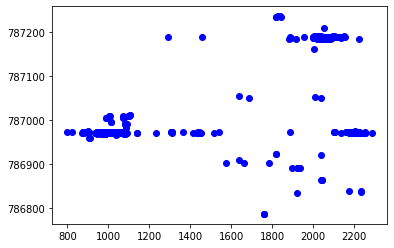

In [65]:
import matplotlib.pyplot as plt
plt.scatter(ys,xs,color="blue")
plt.plot()

In [102]:
ys

0       1016.0
1       2041.0
2       2043.0
3       2043.0
4       2045.0
         ...  
1019    2069.0
1020    2070.0
1021    2070.0
1022    2070.0
1023    2071.0
Name: time, Length: 1024, dtype: float64

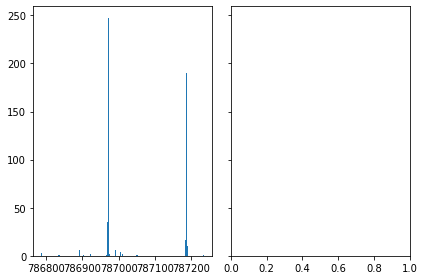

In [81]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
n_bins = int(xs.shape[0]/2)
f_data=axs[0].hist(xs, bins=n_bins)
#axs[1].hist(ys, bins=n_bins)

In [0]:
f_data[0]##HOlds frequency

In [0]:
f_data[1]##Holds the position

In [0]:
indexes=[]
for i,x in enumerate(f_data[0]):
  if x==0:
    indexes.append(i)

In [0]:
neg_positions=[f_data[1][i] for i in indexes]

In [91]:
len(neg_positions)

465

In [0]:
lat=X_one["pick_lat"].values
time=X_one["time"].values
lng=X_one["pick_lng"].values
loc=X_one["pick_lng"].values##Function of lat and lng

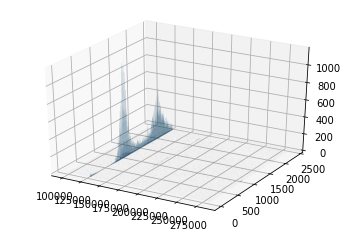

In [96]:
#3d plotting

from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(lat, time, bins=500, )

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

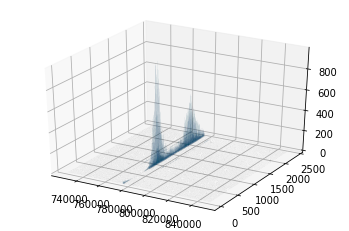

In [98]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(lng, time, bins=500, )

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

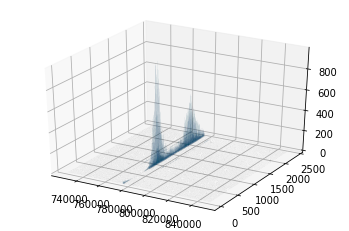

In [100]:
#Latitudes and Longitues show the same trend.Checking for loc

#3d plotting

from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(loc, time, bins=500, )

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [0]:
##NOICE..SAME TREND FOLLOWS
##Now..locations from where there are no rides
neg_positions

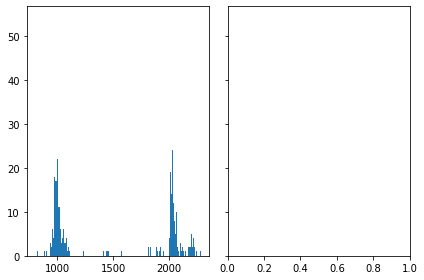

In [103]:
#Find the times where there are no rides

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
n_bins = int(xs.shape[0]/2)
f_time=axs[0].hist(ys, bins=n_bins)
#axs[1].hist(ys, bins=n_bins)

In [0]:
time_indexes=[]
for i,x in enumerate(f_time[0]):
  if x==0:
    time_indexes.append(i)

In [0]:
neg_time=[f_time[1][i] for i in time_indexes]

In [0]:
##We now have new data:neg_time,neg_positions

In [0]:
##Need to add them to the df X_one
X_one=X_one[X_one["number"]==50291]



In [115]:
X_one=

,number,pick_lat,pick_lng,time,Result,loc
0,50291.0,129473.0,776247.0,1016.0,1,786970.560274
1,50291.0,129168.0,776518.0,2041.0,1,787187.764481
2,50291.0,129168.0,776518.0,2043.0,1,787187.764481
3,50291.0,129168.0,776518.0,2043.0,1,787187.764481
4,50291.0,129168.0,776518.0,2045.0,1,787187.764481
...,...,...,...,...,...,...
1019,50291.0,129187.0,776516.0,2069.0,1,787188.909491
1020,50291.0,129187.0,776516.0,2070.0,1,787188.909491
1021,50291.0,129187.0,776516.0,2070.0,1,787188.909491
1022,50291.0,129187.0,776516.0,2070.0,1,787188.909491
